<a href="https://colab.research.google.com/github/nikhila3100/nikhila_info5502_spring2022/blob/main/lab_assignment_07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## The seventh Lab-assignment (03/31/2022, 50 points in total)

The purpose of this exercise is to build several regression models based on real-world datasets. 

### Question 1 (25 points) Build a regession model to predict the change in price of the stock overtime. It can either be linear regression or non-linear regression. You can download the dataset from here: https://github.com/unt-iialab/info5502-spring2022/blob/main/datasets/portfolio_data.csv. The implementation of the LSTM on this same dataset was posted here as an reference: https://www.kaggle.com/code/faressayah/stock-market-analysis-prediction-using-lstm/notebook

In [1]:
### You code here

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [2]:
pip install keras

In [3]:
pip install tensorflow

     |████████████████████████████████| 462 kB 5.2 MB/s 


In [22]:
df=pd.read_csv("/content/portfolio_data.csv")
df.head()

,Date,AMZN,DPZ,BTC,NFLX
0,5/1/2013,248.229996,51.190983,106.250000,30.415714
1,5/2/2013,252.550003,51.987320,98.099998,30.641428
2,5/3/2013,258.049988,52.446388,112.900002,30.492857
3,5/6/2013,255.720001,53.205257,109.599998,30.098572
4,5/7/2013,257.730011,54.151505,113.199997,29.464285


Root Mean Square Error score is 21.479712235055025
R2 Score is 0.9597280743181571


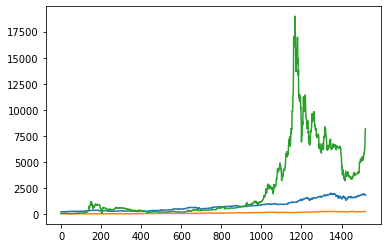

In [32]:
x = df.drop(['Date', 'NFLX'], axis = 1)
y = df['NFLX']
plt.plot(x)
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
print("Root Mean Square Error score is",np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score is", r2_score(y_test, y_pred))

RMSE score is 14.72121535850923
R2 Score is 0.9810838472928576


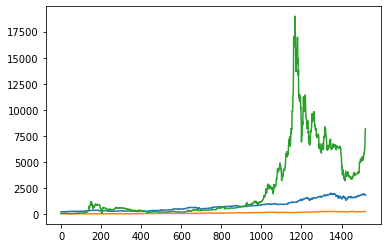

In [31]:
from sklearn.tree import DecisionTreeRegressor
x = df.drop(['Date', 'NFLX'], axis = 1)
y = df['NFLX']
plt.plot(x)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

# fitting the decision tree regressor model
dtr = DecisionTreeRegressor()
dtr.fit(x_train, y_train)

y_pred = dtr.predict(x_test)

# metrics to evaluate the decision tree regressor model
print("RMSE score is",np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score is", r2_score(y_test, y_pred))

RMSE score is 11.106742773748609
R2 Score is 0.9892324001668802


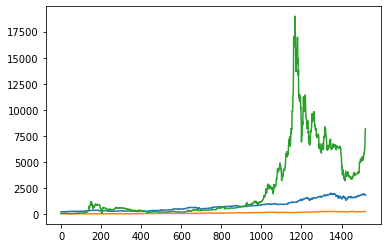

In [35]:
from sklearn.ensemble import RandomForestRegressor
x = df.drop(['Date', 'NFLX'], axis = 1)
plt.plot(x)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

# fitting the random forest model
rfr = RandomForestRegressor(random_state=211)
rfr.fit(x_train, y_train)

# metrics to evaluate the random forest regressor model
rfr_pred = rfr.predict(x_test)
print("RMSE score is",np.sqrt(mean_squared_error(y_test, rfr_pred)))
print("R2 Score is", r2_score(y_test, rfr_pred))

### Question 2 (25 points) The objective of this task is to detect hate speech in tweets. For the sake of simplicity, we say a tweet contains hate speech if it has a racist or sexist sentiment associated with it. So, the task is to classify racist or sexist tweets from other tweets. Formally, given a training sample of tweets and labels, where label '1' denotes the tweet is racist/sexist and label '0' denotes the tweet is not racist/sexist, your objective is to predict the labels on the test dataset. The dataset can be downloaded here: https://github.com/unt-iialab/info5502-spring2022/tree/main/datasets/Twitter%20Sentiment%20Analysis. Please build a logistic regression model for the classification, evaluation metrics include accuracy, precision, recall, and F-1 score need to be reported. 

In [36]:
### You code here:

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [38]:
slt = pd.read_csv("/content/train.csv.zip")
slt.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: The default value of regex will change from True to False in a future version.
  if sys.path[0] == '':


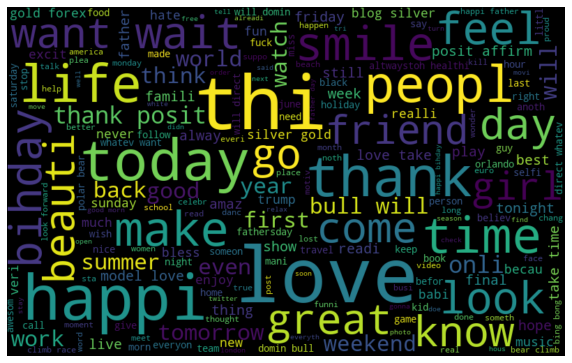

In [45]:
df1 = pd.read_csv('/content/train.csv.zip')
df2 = pd.read_csv('/content/test.csv.zip')
df1.head()
tw = df1.append(df2, ignore_index = True)
df1.head()
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i,'',input_txt)
    return input_txt
tw['tidy_tweet'] = np.vectorize(remove_pattern)(tw['tweet'], '@[\w]*')
tw['tidy_tweet'] = tw['tidy_tweet'].str.replace('[^a-zA-Z#]+',' ')
tw['tidy_tweet'] = tw['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w) > 3]))
tokenized_tweet = tw['tidy_tweet'].apply(lambda x: x.split())
from nltk.stem.porter import *
stemmer = PorterStemmer()
tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x])
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])
tw['tidy_tweet']  = tokenized_tweet
all_words = ' '.join([text for text in tw['tidy_tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

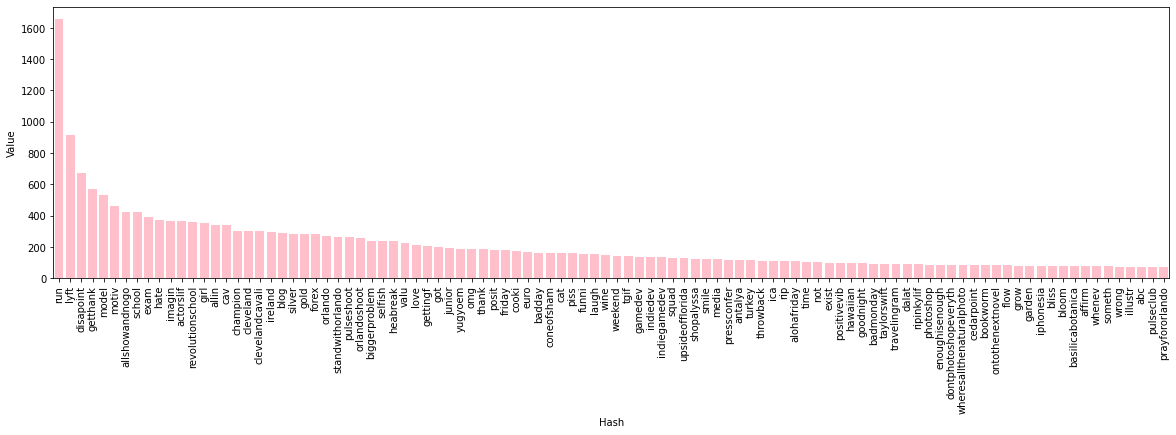

In [57]:
def hashtag_extract(b):
    hashtags = []
    for i in b:
        hash = re.findall(r'#(\w+)', i)
        hashtags.append(hash)
    return hashtags
#extracting labels
HT_regular = hashtag_extract(tw['tidy_tweet'][tw['label'] == 0])
HT_negative = hashtag_extract(tw['tidy_tweet'][tw['label'] == 1])
#counting sum
HT_regular = sum(HT_regular, [])
HT_negative = sum(HT_negative, [])

X = nltk.FreqDist(HT_regular)
Y = pd.DataFrame({'Hash': list(X.keys()),
                  'Value' : list(X.values())})
Y = Y.nlargest(columns = 'Value', n = 100)
plt.figure(figsize = (20,5))
plot1 = sns.barplot(data =Y, x = 'Hash', y = 'Value',facecolor="pink")
plot1.set_xticklabels(list(X.keys()), rotation=90)
plt.show()

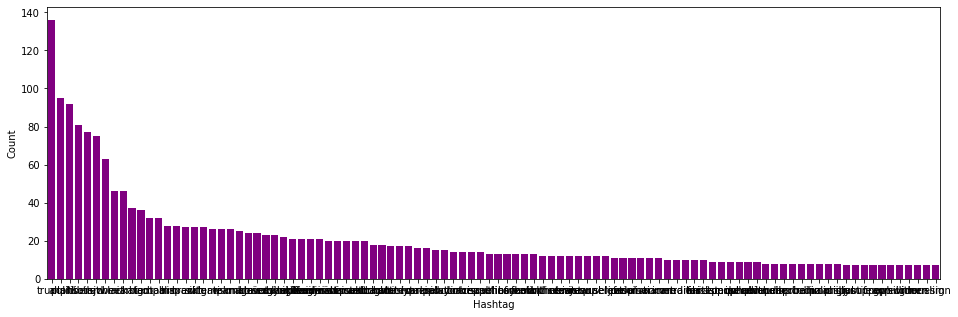

In [62]:
X = nltk.FreqDist(HT_negative)
Y = pd.DataFrame({'Hashtag': list(X.keys()),
                  'Count' : list(X.values())})

Y = Y.nlargest(columns = 'Count', n = 100)

plt.figure(figsize = (16,5))
X = sns.barplot(data =Y, x = 'Hashtag', y = 'Count', facecolor="purple")
plt.show()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.99, min_df=6, max_features=1000, stop_words='english')
bow = bow_vectorizer.fit_transform(tw['tidy_tweet'])
len(bow_vectorizer.get_feature_names())
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.99, min_df=6, max_features=1000, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(tw['tidy_tweet'])
X.shape
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
X_bow = bow[:31962,:]
Y_bow = bow[31962:,:]
xX_bow, xvalid_bow, yX, yvalid = train_test_split(X_bow, X['label'], test_size = 0.5)
lr = LogisticRegression()
lr.fit(xX_bow, yX)
pr = lr.predict_proba(xvalid_bow)
pre_int = pr[:,1] >= 0.5
pre_int = pre_int.astype(np.int)
f1_score(yvalid, pre_int)